In [41]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data1 = loadmat('data/Subject1/subj01_sess02_MEG_data_cube.mat')
data2 = loadmat('data/Subject1/subj01_sess03_MEG_data_cube.mat')
data3 = loadmat('data/Subject1/subj01_sess04_MEG_data_cube.mat')
data4 = loadmat('data/Subject1/subj01_sess05_MEG_data_cube.mat')

In [42]:
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'btn', 'auto', 'data_cube', 'SR', 'tAx'])

In [2]:
data_cube_1 = data1['data_cube']
data_cube_2 = data2['data_cube']
data_cube_3 = data3['data_cube']
data_cube_4 = data4['data_cube']

In [3]:
print(data_cube_1.shape)
print(data_cube_2.shape)
print(data_cube_3.shape)
print(data_cube_4.shape)


(306, 2251, 350)
(306, 2251, 250)
(306, 2251, 350)
(306, 2251, 350)


In [4]:
btn1 = data1['btn']
btn2 = data2['btn']
btn3 = data3['btn']
btn4 = data4['btn']


In [49]:
data1['tAx'].shape

(1, 2251)

In [45]:
auto1 = data1['auto']

In [5]:
data_cube_1_1 = data_cube_1[:, :, np.where(btn1==1)[0]]

In [6]:
data_cube_1_1 = data_cube_1[:, :, np.where(btn1==0)[0]]

In [7]:
data_cube_1_1.shape

(306, 2251, 100)

In [8]:
data_cube_1_1.shape

(306, 2251, 100)

In [9]:
data_cube_1_1 = data_cube_1[:, :, np.where(btn1==1)[0]]
data_cube_1_0 = data_cube_1[:, :, np.where(btn1==0)[0]]
data_cube_2_1 = data_cube_2[:, :, np.where(btn2==1)[0]]
data_cube_2_0 = data_cube_2[:, :, np.where(btn2==0)[0]]
data_cube_3_1 = data_cube_3[:, :, np.where(btn3==1)[0]]
data_cube_3_0 = data_cube_3[:, :, np.where(btn3==0)[0]]
data_cube_4_1 = data_cube_4[:, :, np.where(btn4==1)[0]]
data_cube_4_0 = data_cube_4[:, :, np.where(btn4==0)[0]]

In [10]:
data_cube_all_1 = np.concatenate([data_cube_1_1, data_cube_2_1, data_cube_3_1, data_cube_4_1], axis=2)

In [11]:
data_cube_all_1.shape

(306, 2251, 916)

In [12]:
data_cube_all_0 = np.concatenate([data_cube_1_0, data_cube_2_0, data_cube_3_0, data_cube_4_0], axis=2)

In [13]:
data_cube_all_0.shape

(306, 2251, 384)

In [14]:
channel_mean_data_cube_all_1 = np.mean(data_cube_all_1, axis=0)
channel_mean_data_cube_all_1.shape

(2251, 916)

In [15]:
channel_mean_data_cube_all_0 = np.mean(data_cube_all_0, axis=0)
channel_mean_data_cube_all_0.shape

(2251, 384)

In [16]:
y = np.concatenate([np.ones(channel_mean_data_cube_all_1.shape[1]), np.zeros(channel_mean_data_cube_all_0.shape[1])])

In [17]:
len(y)

1300

In [18]:
X = np.concatenate([channel_mean_data_cube_all_1, channel_mean_data_cube_all_0], axis=1).T

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
bin_size = 250
step_size = bin_size/2
scores = []


for i in range(X_train.shape[1]-bin_size-1):
    start = i
    end = i + bin_size
    clf = LogisticRegression()
    clf.fit(X_train_scaled[:, start:end], y_train)
    score = clf.score(X_test_scaled[:, start:end], y_test)
    print(score)
    scores.append(score)


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616
0.7415384615384616


/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/envs/general/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

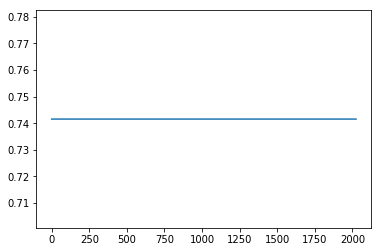

In [31]:
import matplotlib.pyplot as plt
plt.plot(scores)

In [51]:
data_mean_over_trials = np.mean(data_cube_1, axis=2)
data_mean_over_trials.shape

(306, 2251)

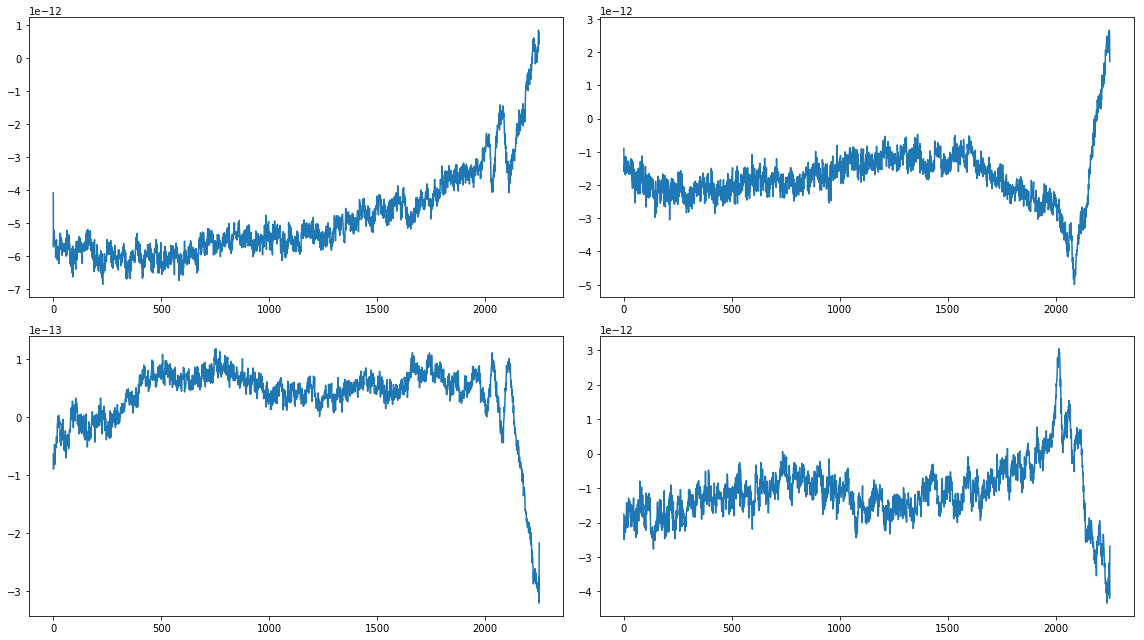

In [52]:
fig, axs = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(9)
fig.set_figwidth(16)

axs[0][0].plot(data_mean_over_trials[0])
axs[0][1].plot(data_mean_over_trials[1])
axs[1][0].plot(data_mean_over_trials[2])
axs[1][1].plot(data_mean_over_trials[3])

plt.tight_layout()